In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../DATA/cancer_classification.csv")

In [5]:
# df.info()

In [6]:
# df.describe().transpose()

In [7]:
pd.set_option('display.max_columns', None)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:>

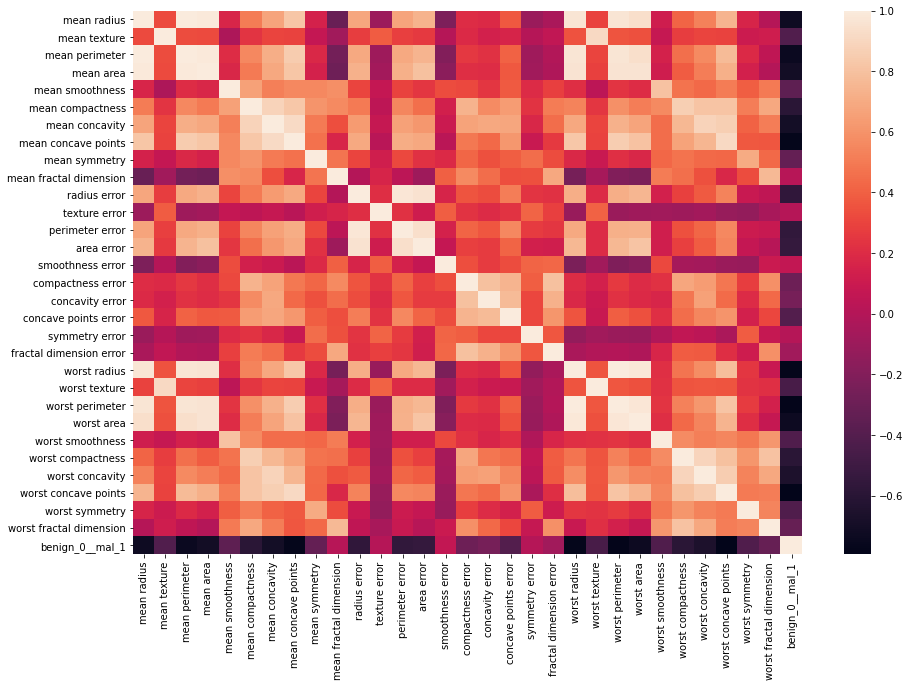

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

In [9]:
# plt.figure(figsize=(10,10))
# sns.boxplot(x='benign_0__mal_1',y='worst concave points',data=df)

In [10]:
# plt.figure(figsize=(10,10))
# sns.boxplot(x='benign_0__mal_1',y='worst perimeter',data=df)

In [11]:
# df.corr()['benign_0__mal_1'].sort_values()

# Model

In [12]:
X = df.drop('benign_0__mal_1',axis=1)
y = df['benign_0__mal_1']

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler_grid_search = MinMaxScaler().fit(X)
X_grid_search = scaler_grid_search.transform(X)

In [77]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout

# GRID SEARCH

In [68]:
def create_model(activation,neurons,dropout_rate=0):
    model = Sequential()

    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons/2, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons/2, activation=activation))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='BinaryCrossentropy', optimizer='adam')
    
    return model

In [69]:
model = KerasClassifier(build_fn=create_model)

In [70]:
param_grid = dict(
                    epochs = [100] #range(20,120,20)
#                   ,  batch_size = [1], #range(90,90,200)
                    ,neurons = [30,60]
                    ,activation = ['relu'] #['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
                    
#                     ,learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
#                     ,momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
    
#                     ,init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

#                     ,weight_constraint = [1, 2, 3, 4, 5]
                    ,dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
                  )

grid = GridSearchCV(estimator=model, scoring='accuracy', param_grid=param_grid, n_jobs=1, cv=3)

In [71]:
grid_result = grid.fit(X_grid_search, y.values)

Epoch 1/100
12/12 [==============================] - 1s 948us/step - loss: 0.7041
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6730
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6563
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6301
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5950
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5502
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4826
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3969
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3180
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2789
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2171
Epoch 12/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1916
Epoch 13/100
12/12 [===============

12/12 [==============================] - 1s 907us/step - loss: 0.6883
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6615
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6336
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5997
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5569
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5133
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4508
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3862
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2987
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2637
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2221
Epoch 12/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1872
Epoch 13/100
12/12 [===========================

Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6776
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6560
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 0.6291
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5892
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5423
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4807
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4169
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3352
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2670
Epoch 11/100
12/12 [==============================] - 0s 907us/step - loss: 0.2469
Epoch 12/100
12/12 [==============================] - 0s 906us/step - loss: 0.2054
Epoch 13/100
12/12 [==============================] - 0s 905us/step - loss: 0.1854
Epoch 14/100
12/12 [==========

12/12 [==============================] - 0s 2ms/step - loss: 0.6357
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5776
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4879
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3991
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3299
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2866
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1915
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2066
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1701
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1594
Epoch 12/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1199
Epoch 13/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1288
Epoch 14/100
12/12 [============================

12/12 [==============================] - 0s 2ms/step - loss: 0.5658
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4884
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3980
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3147
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2415
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2075
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1550
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1540
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1827
Epoch 12/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1316
Epoch 13/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1297
Epoch 14/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1035
Epoch 15/100
12/12 [===========================

12/12 [==============================] - 0s 1ms/step - loss: 0.5827
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5094
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4216
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3205
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2557
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2211
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1731
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1789
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1600
Epoch 12/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1226
Epoch 13/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1545
Epoch 14/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1679
Epoch 15/100
12/12 [===========================

12/12 [==============================] - 0s 2ms/step - loss: 0.5892
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5678
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4933
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4978
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4351
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4322
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3989
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3340
Epoch 12/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3370
Epoch 13/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3027
Epoch 14/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3028
Epoch 15/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2600
Epoch 16/100
12/12 [==========================

12/12 [==============================] - 0s 1ms/step - loss: 0.6003
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5711
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4991
Epoch 8/100
12/12 [==============================] - 0s 997us/step - loss: 0.4674
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3905
Epoch 10/100
12/12 [==============================] - 0s 907us/step - loss: 0.3628
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3397
Epoch 12/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2983
Epoch 13/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2964
Epoch 14/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2478
Epoch 15/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2850
Epoch 16/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2926
Epoch 17/100
12/12 [=====================

12/12 [==============================] - 0s 1ms/step - loss: 0.5749
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5297
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4806
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4205
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4076
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3623
Epoch 12/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3354
Epoch 13/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3356
Epoch 14/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3167
Epoch 15/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2539
Epoch 16/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2643
Epoch 17/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2036
Epoch 18/100
12/12 [========================

12/12 [==============================] - 0s 3ms/step - loss: 0.3603
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2864
Epoch 9/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2276
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2544
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2307
Epoch 12/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1891
Epoch 13/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2258
Epoch 14/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2052
Epoch 15/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1764
Epoch 16/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1672
Epoch 17/100
12/12 [==============================] - ETA: 0s - loss: 0.240 - 0s 2ms/step - loss: 0.1763
Epoch 18/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1622
Epoch 19/100
12/12 

12/12 [==============================] - 0s 1ms/step - loss: 0.3461
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2773
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2654
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2528
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2483
Epoch 12/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2483
Epoch 13/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2017
Epoch 14/100
12/12 [==============================] - 0s 997us/step - loss: 0.1923
Epoch 15/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2085
Epoch 16/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1900
Epoch 17/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1615
Epoch 18/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1739
Epoch 19/100
12/12 [=====================

12/12 [==============================] - 0s 2ms/step - loss: 0.3549
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2626
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2504
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2609
Epoch 12/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2335
Epoch 13/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1841
Epoch 14/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1721
Epoch 15/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2190
Epoch 16/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1978
Epoch 17/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1607
Epoch 18/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1985
Epoch 19/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1998
Epoch 20/100
12/12 [======================

12/12 [==============================] - 0s 2ms/step - loss: 0.4624
Epoch 10/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4662
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4275
Epoch 12/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3728
Epoch 13/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3678
Epoch 14/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3560
Epoch 15/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3840
Epoch 16/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3661
Epoch 17/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2863
Epoch 18/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3583
Epoch 19/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3208
Epoch 20/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2665
Epoch 21/100
12/12 [=====================

12/12 [==============================] - 0s 1ms/step - loss: 0.4162
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3854
Epoch 12/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3707
Epoch 13/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3216
Epoch 14/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3145
Epoch 15/100
12/12 [==============================] - 0s 907us/step - loss: 0.3683
Epoch 16/100
12/12 [==============================] - 0s 906us/step - loss: 0.3777
Epoch 17/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2884
Epoch 18/100
12/12 [==============================] - 0s 907us/step - loss: 0.2901
Epoch 19/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3038
Epoch 20/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2852
Epoch 21/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2898
Epoch 22/100
12/12 [===============

12/12 [==============================] - 0s 1ms/step - loss: 0.4898
Epoch 11/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4318
Epoch 12/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3895
Epoch 13/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3338
Epoch 14/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3441
Epoch 15/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3293
Epoch 16/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3308
Epoch 17/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2905
Epoch 18/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2885
Epoch 19/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2998
Epoch 20/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2842
Epoch 21/100
12/12 [==============================] - 0s 997us/step - loss: 0.3078
Epoch 22/100
12/12 [===================

12/12 [==============================] - 0s 1ms/step - loss: 0.2878
Epoch 12/100
12/12 [==============================] - 0s 997us/step - loss: 0.2618
Epoch 13/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2815
Epoch 14/100
12/12 [==============================] - 0s 997us/step - loss: 0.1930
Epoch 15/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2533
Epoch 16/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1991
Epoch 17/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2368
Epoch 18/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1634
Epoch 19/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2126
Epoch 20/100
12/12 [==============================] - 0s 1ms/step - loss: 0.1634
Epoch 21/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2273
Epoch 22/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1308
Epoch 23/100
12/12 [=================

12/12 [==============================] - 0s 1ms/step - loss: 0.3435
Epoch 13/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3584
Epoch 14/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3421
Epoch 15/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2899
Epoch 16/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3178
Epoch 17/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3119
Epoch 18/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2724
Epoch 19/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2839
Epoch 20/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2824
Epoch 21/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3000
Epoch 22/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2280
Epoch 23/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2132
Epoch 24/100
12/12 [=====================

Epoch 13/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2753
Epoch 14/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2777
Epoch 15/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2705
Epoch 16/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2880
Epoch 17/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2192
Epoch 18/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2166
Epoch 19/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2629
Epoch 20/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2276
Epoch 21/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2445
Epoch 22/100
12/12 [==============================] - 0s 997us/step - loss: 0.2507
Epoch 23/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2242
Epoch 24/100
12/12 [==============================] - 0s 996us/step - loss: 0.1770
Epoch 25/100
12/12 [====

12/12 [==============================] - 0s 1ms/step - loss: 0.4605
Epoch 14/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4094
Epoch 15/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3917
Epoch 16/100
12/12 [==============================] - 0s 907us/step - loss: 0.3694
Epoch 17/100
12/12 [==============================] - 0s 997us/step - loss: 0.3993
Epoch 18/100
12/12 [==============================] - 0s 816us/step - loss: 0.3394
Epoch 19/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3719
Epoch 20/100
12/12 [==============================] - 0s 996us/step - loss: 0.3295
Epoch 21/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3904
Epoch 22/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3364
Epoch 23/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3691
Epoch 24/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2978
Epoch 25/100
12/12 [=============

12/12 [==============================] - 0s 1ms/step - loss: 0.4694
Epoch 14/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4907
Epoch 15/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4371
Epoch 16/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4630
Epoch 17/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4160
Epoch 18/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3873
Epoch 19/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3669
Epoch 20/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4014
Epoch 21/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4043
Epoch 22/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3462
Epoch 23/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3739
Epoch 24/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3288
Epoch 25/100
12/12 [=====================

12/12 [==============================] - 0s 997us/step - loss: 0.4214
Epoch 15/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4074
Epoch 16/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3983
Epoch 17/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3763
Epoch 18/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3620
Epoch 19/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3586
Epoch 20/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3507
Epoch 21/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2896
Epoch 22/100
12/12 [==============================] - 0s 998us/step - loss: 0.3128
Epoch 23/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3848
Epoch 24/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3084
Epoch 25/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3590
Epoch 26/100
12/12 [=================

12/12 [==============================] - 0s 1ms/step - loss: 0.3117
Epoch 16/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3313
Epoch 17/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2499
Epoch 18/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2901
Epoch 19/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2317
Epoch 20/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2821
Epoch 21/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3060
Epoch 22/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3131
Epoch 23/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2684
Epoch 24/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2475
Epoch 25/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2130
Epoch 26/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2345
Epoch 27/100
12/12 [=====================

12/12 [==============================] - 0s 1ms/step - loss: 0.2903
Epoch 16/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3228
Epoch 17/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2934
Epoch 18/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2876
Epoch 19/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3445
Epoch 20/100
12/12 [==============================] - 0s 997us/step - loss: 0.3368
Epoch 21/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3481
Epoch 22/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2889
Epoch 23/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3164
Epoch 24/100
12/12 [==============================] - 0s 997us/step - loss: 0.2562
Epoch 25/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2683
Epoch 26/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2887
Epoch 27/100
12/12 [=================

12/12 [==============================] - 0s 1ms/step - loss: 0.2949
Epoch 17/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2665
Epoch 18/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3264
Epoch 19/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2729
Epoch 20/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2691
Epoch 21/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3020
Epoch 22/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2995
Epoch 23/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2573
Epoch 24/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2660
Epoch 25/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2481
Epoch 26/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2125
Epoch 27/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3123
Epoch 28/100
12/12 [=====================

12/12 [==============================] - 0s 1ms/step - loss: 0.5012
Epoch 18/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4789
Epoch 19/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4597
Epoch 20/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4314
Epoch 21/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4582
Epoch 22/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4423
Epoch 23/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4470
Epoch 24/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3706
Epoch 25/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3688
Epoch 26/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3681
Epoch 27/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4109
Epoch 28/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3695
Epoch 29/100
12/12 [=====================

12/12 [==============================] - 0s 997us/step - loss: 0.5137
Epoch 18/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4515
Epoch 19/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5440
Epoch 20/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4931
Epoch 21/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4468
Epoch 22/100
12/12 [==============================] - 0s 906us/step - loss: 0.4466
Epoch 23/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4225
Epoch 24/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4176
Epoch 25/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4217
Epoch 26/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4824
Epoch 27/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3697
Epoch 28/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4471
Epoch 29/100
12/12 [=================

12/12 [==============================] - 0s 1ms/step - loss: 0.4703
Epoch 18/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4836
Epoch 19/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4436
Epoch 20/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4432
Epoch 21/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4672
Epoch 22/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4418
Epoch 23/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3717
Epoch 24/100
12/12 [==============================] - 0s 997us/step - loss: 0.4098
Epoch 25/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3905
Epoch 26/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3893
Epoch 27/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3599
Epoch 28/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3842
Epoch 29/100
12/12 [===================

12/12 [==============================] - 0s 1ms/step - loss: 0.3463
Epoch 19/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3532
Epoch 20/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3247
Epoch 21/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3347
Epoch 22/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2917
Epoch 23/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3487
Epoch 24/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3357
Epoch 25/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3113
Epoch 26/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2537
Epoch 27/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2985
Epoch 28/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2709
Epoch 29/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2924
Epoch 30/100
12/12 [=====================

12/12 [==============================] - 0s 1ms/step - loss: 0.3724
Epoch 20/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3544
Epoch 21/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3736
Epoch 22/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3743
Epoch 23/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3524
Epoch 24/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3990
Epoch 25/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3417
Epoch 26/100
12/12 [==============================] - 0s 997us/step - loss: 0.3559
Epoch 27/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3507
Epoch 28/100
12/12 [==============================] - 0s 997us/step - loss: 0.3231
Epoch 29/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3047
Epoch 30/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2999
Epoch 31/100
12/12 [=================

12/12 [==============================] - 0s 1ms/step - loss: 0.3215
Epoch 21/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3287
Epoch 22/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3146
Epoch 23/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3565
Epoch 24/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3176
Epoch 25/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2978
Epoch 26/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2962
Epoch 27/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3057
Epoch 28/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2802
Epoch 29/100
12/12 [==============================] - 0s 1ms/step - loss: 0.2994
Epoch 30/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3220
Epoch 31/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3399
Epoch 32/100
12/12 [=====================

12/12 [==============================] - 0s 1ms/step - loss: 0.5285
Epoch 21/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5075
Epoch 22/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5341
Epoch 23/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5653
Epoch 24/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4987
Epoch 25/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4972
Epoch 26/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4857
Epoch 27/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4950
Epoch 28/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4706
Epoch 29/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4650
Epoch 30/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4557
Epoch 31/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4716
Epoch 32/100
12/12 [=====================

12/12 [==============================] - 0s 1ms/step - loss: 0.5677
Epoch 22/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5435
Epoch 23/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5226
Epoch 24/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5497
Epoch 25/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5496
Epoch 26/100
12/12 [==============================] - 0s 997us/step - loss: 0.4790
Epoch 27/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4952
Epoch 28/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4913
Epoch 29/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4706
Epoch 30/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4703
Epoch 31/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4840
Epoch 32/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4513
Epoch 33/100
12/12 [===================

12/12 [==============================] - 0s 2ms/step - loss: 0.5335
Epoch 23/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5516
Epoch 24/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5047
Epoch 25/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4977
Epoch 26/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4945
Epoch 27/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5042
Epoch 28/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5019
Epoch 29/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4662
Epoch 30/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4875
Epoch 31/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4348
Epoch 32/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4763
Epoch 33/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4736
Epoch 34/100
12/12 [=====================

12/12 [==============================] - 0s 1ms/step - loss: 0.4358
Epoch 24/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3623
Epoch 25/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3691
Epoch 26/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3474
Epoch 27/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3611
Epoch 28/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3840
Epoch 29/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4104
Epoch 30/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3236
Epoch 31/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3037
Epoch 32/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3663
Epoch 33/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3273
Epoch 34/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3351
Epoch 35/100
12/12 [=====================

12/12 [==============================] - 0s 2ms/step - loss: 0.4336
Epoch 25/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4252
Epoch 26/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3534
Epoch 27/100
12/12 [==============================] - 0s 997us/step - loss: 0.3995
Epoch 28/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4300
Epoch 29/100
12/12 [==============================] - 0s 997us/step - loss: 0.3861
Epoch 30/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3797
Epoch 31/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3663
Epoch 32/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3395
Epoch 33/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3164
Epoch 34/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3689
Epoch 35/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3616
Epoch 36/100
12/12 [=================

12/12 [==============================] - 0s 1ms/step - loss: 0.4090
Epoch 26/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3746
Epoch 27/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3974
Epoch 28/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4160
Epoch 29/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3746
Epoch 30/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4257
Epoch 31/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3186
Epoch 32/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3391
Epoch 33/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3395
Epoch 34/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3106
Epoch 35/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3064
Epoch 36/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3795
Epoch 37/100
12/12 [=====================

12/12 [==============================] - 0s 1ms/step - loss: 0.5557
Epoch 27/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5364
Epoch 28/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5163
Epoch 29/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5275
Epoch 30/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4636
Epoch 31/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4728
Epoch 32/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4706
Epoch 33/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4577
Epoch 34/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4960
Epoch 35/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5323
Epoch 36/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4851
Epoch 37/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4467
Epoch 38/100
12/12 [=====================

12/12 [==============================] - 0s 1ms/step - loss: 0.5862
Epoch 28/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5904
Epoch 29/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5976
Epoch 30/100
12/12 [==============================] - 0s 998us/step - loss: 0.6012
Epoch 31/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5873
Epoch 32/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5877
Epoch 33/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5406
Epoch 34/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5875
Epoch 35/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5409
Epoch 36/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5831
Epoch 37/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5262
Epoch 38/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5444
Epoch 39/100
12/12 [===================

12/12 [==============================] - 0s 1ms/step - loss: 0.5785
Epoch 29/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5754
Epoch 30/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5382
Epoch 31/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5350
Epoch 32/100
12/12 [==============================] - 0s 997us/step - loss: 0.5985
Epoch 33/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5455
Epoch 34/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5063
Epoch 35/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5447
Epoch 36/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5213
Epoch 37/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5045
Epoch 38/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5766
Epoch 39/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5049
Epoch 40/100
12/12 [===================

12/12 [==============================] - 0s 1ms/step - loss: 0.4532
Epoch 30/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4596
Epoch 31/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4457
Epoch 32/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4309
Epoch 33/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4436
Epoch 34/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4596
Epoch 35/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3767
Epoch 36/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4323
Epoch 37/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4318
Epoch 38/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4501
Epoch 39/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4620
Epoch 40/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3863
Epoch 41/100
12/12 [=====================

12/12 [==============================] - 0s 2ms/step - loss: 0.4609
Epoch 31/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5250
Epoch 32/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4895
Epoch 33/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4685
Epoch 34/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4808
Epoch 35/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4568
Epoch 36/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4418
Epoch 37/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4697
Epoch 38/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4360
Epoch 39/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5103
Epoch 40/100
12/12 [==============================] - 0s 1ms/step - loss: 0.3965
Epoch 41/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4184
Epoch 42/100
12/12 [=====================

12/12 [==============================] - 0s 2ms/step - loss: 0.4672
Epoch 32/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4805
Epoch 33/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4588
Epoch 34/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4731
Epoch 35/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4544
Epoch 36/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4855
Epoch 37/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4562
Epoch 38/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4482
Epoch 39/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4164
Epoch 40/100
12/12 [==============================] - 0s 1ms/step - loss: 0.4057
Epoch 41/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4503
Epoch 42/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4524
Epoch 43/100
12/12 [=====================

18/18 [==============================] - 0s 1ms/step - loss: 0.0480
Epoch 33/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0324
Epoch 34/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0506
Epoch 35/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0446
Epoch 36/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0438
Epoch 37/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0706
Epoch 38/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0527
Epoch 39/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0379
Epoch 40/100
18/18 [==============================] - 0s 1ms/step - loss: 0.0450
Epoch 41/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 42/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0345
Epoch 43/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0513
Epoch 44/100
18/18 [=====================

In [72]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.975439 using {'activation': 'relu', 'dropout_rate': 0.0, 'epochs': 100, 'neurons': 60}
0.964829 (0.009060) with: {'activation': 'relu', 'dropout_rate': 0.0, 'epochs': 100, 'neurons': 30}
0.975439 (0.017891) with: {'activation': 'relu', 'dropout_rate': 0.0, 'epochs': 100, 'neurons': 60}
0.973666 (0.012869) with: {'activation': 'relu', 'dropout_rate': 0.1, 'epochs': 100, 'neurons': 30}
0.971911 (0.012379) with: {'activation': 'relu', 'dropout_rate': 0.1, 'epochs': 100, 'neurons': 60}
0.966639 (0.015059) with: {'activation': 'relu', 'dropout_rate': 0.2, 'epochs': 100, 'neurons': 30}
0.943832 (0.039901) with: {'activation': 'relu', 'dropout_rate': 0.2, 'epochs': 100, 'neurons': 60}
0.952594 (0.030049) with: {'activation': 'relu', 'dropout_rate': 0.3, 'epochs': 100, 'neurons': 30}
0.922761 (0.045495) with: {'activation': 'relu', 'dropout_rate': 0.3, 'epochs': 100, 'neurons': 60}
0.940314 (0.040582) with: {'activation': 'relu', 'dropout_rate': 0.4, 'epochs': 100, 'neurons': 30}
0.892

# Final Model

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [74]:
scaler = MinMaxScaler().fit(X_train)

In [75]:
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [106]:
callback = EarlyStopping(monitor='val_loss', patience=20, mode='min')

model_final = Sequential()

model_final.add(Dense(60,activation='relu'))
model_final.add(Dropout(0.2))
model_final.add(Dense(30,activation='relu'))
model_final.add(Dropout(0.2))
model_final.add(Dense(1,activation='sigmoid'))

model_final.compile(optimizer='adam',loss='binary_crossentropy')

In [107]:
model_final.fit(x=X_train_norm,y=y_train.values,
              validation_data=(X_test_norm,y_test.values),
              epochs=500, 
              callbacks=callback)

Epoch 1/500
14/14 [==============================] - 1s 11ms/step - loss: 0.6917 - val_loss: 0.6518
Epoch 2/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6408 - val_loss: 0.5955
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 0.5837 - val_loss: 0.5293
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5317 - val_loss: 0.4574
Epoch 5/500
14/14 [==============================] - 0s 4ms/step - loss: 0.4509 - val_loss: 0.3869
Epoch 6/500
14/14 [==============================] - 0s 4ms/step - loss: 0.3968 - val_loss: 0.3234
Epoch 7/500
14/14 [==============================] - 0s 4ms/step - loss: 0.3366 - val_loss: 0.2808
Epoch 8/500
14/14 [==============================] - 0s 4ms/step - loss: 0.3155 - val_loss: 0.2456
Epoch 9/500
14/14 [==============================] - 0s 4ms/step - loss: 0.2951 - val_loss: 0.2172
Epoch 10/500
14/14 [==============================] - 0s 4ms/step - loss: 0.2743 - val_loss: 0.2042
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0751 - val_loss: 0.1172
Epoch 84/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0600 - val_loss: 0.1064
Epoch 85/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0477 - val_loss: 0.1073
Epoch 86/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0561 - val_loss: 0.1133
Epoch 87/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0519 - val_loss: 0.1156
Epoch 88/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0438 - val_loss: 0.1107
Epoch 89/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0424 - val_loss: 0.1063
Epoch 90/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0359 - val_loss: 0.1066
Epoch 91/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0527 - val_loss: 0.1115
Epoch 92/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0304 - val_loss: 0.1059


In [108]:
losses = pd.DataFrame(model_final.history.history)

<AxesSubplot:>

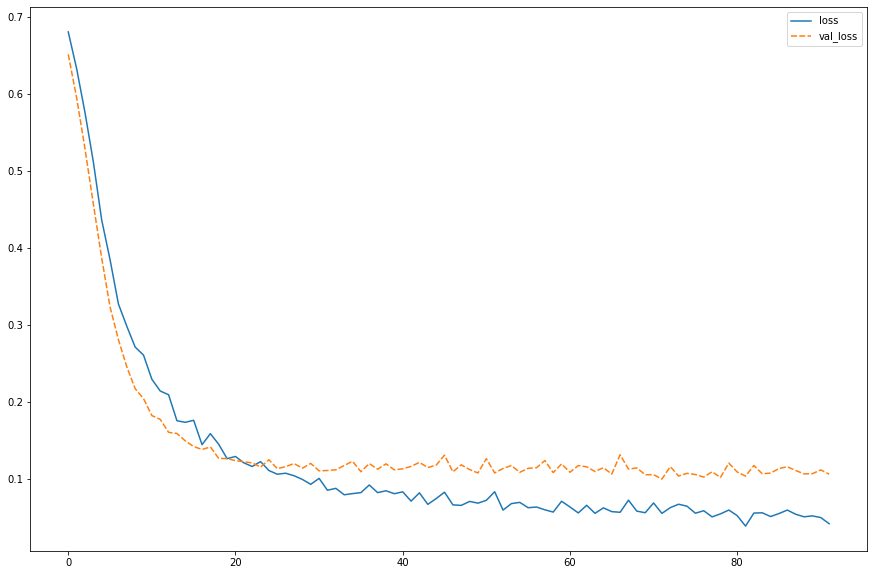

In [109]:
plt.figure(figsize=(15,10))
sns.lineplot(data=losses)

In [114]:
preds = model_final.predict(X_test_norm)

In [115]:
preds

array([[9.9660587e-01],
       [9.9530733e-01],
       [9.9824625e-01],
       [2.4233758e-03],
       [9.9949169e-01],
       [9.9979424e-01],
       [9.9983895e-01],
       [1.0706631e-06],
       [9.9904203e-01],
       [9.9941379e-01],
       [4.1124225e-04],
       [9.9551517e-01],
       [9.5330358e-01],
       [9.9938095e-01],
       [2.1216273e-04],
       [9.9952638e-01],
       [9.9856532e-01],
       [9.9986196e-01],
       [1.7558881e-06],
       [2.4760604e-02],
       [9.6234411e-01],
       [9.9715030e-01],
       [9.9520266e-01],
       [9.9976611e-01],
       [4.6181679e-04],
       [8.4792984e-01],
       [3.7194510e-05],
       [9.9995852e-01],
       [7.1749215e-05],
       [9.9962950e-04],
       [4.3068781e-01],
       [6.9293380e-04],
       [6.8402928e-01],
       [1.0925770e-01],
       [9.9976170e-01],
       [9.9977744e-01],
       [4.8309565e-03],
       [1.3051450e-02],
       [8.6769709e-05],
       [1.8175097e-06],
       [2.1964312e-03],
       [9.960228

In [116]:
preds_01 = np.array([np.where(l <= 0.5, 0, 1) for l in preds])

# Evaluation

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [118]:
preds = model_final.predict(X_test_norm)

print("Accuracy",accuracy_score(y_test,preds_01))
print("Precision",precision_score(y_test,preds_01))
print("Recall",recall_score(y_test,preds_01))

Accuracy 0.9790209790209791
Precision 0.9885057471264368
Recall 0.9772727272727273


In [119]:
confusion_matrix(y_test,preds_01)

array([[54,  1],
       [ 2, 86]], dtype=int64)